In [2]:
import pandas as pd
import numpy as np

data = {
    "Date": pd.date_range("2023-01-01", periods=10),
    "Product": ["Laptop", "Phone", "Tablet", "Laptop", "Phone", 
                "Tablet", "Laptop", "Phone", "Tablet", "Laptop"],
    "Category": ["Electronics"] * 10,
    "Price": [999, 699, 399, 1099, 799, 449, 899, 749, 499, 1299],
    "Units": [5, 8, 12, 4, 9, 7, 6, 10, 5, 3],
    "Region": ["West", "East", "North", "South", "East", 
               "West", "North", "South", "East", "West"]
}

sales = pd.DataFrame(data)
sales["Total"] = sales["Price"] * sales["Units"] # Add revenue cloumn

In [ ]:
""" SUMMARY STATISTICS"""

In [ ]:
# Quick Overview
print(sales.describe()) # For numeric columns
print(sales.describe(include='all')) # Include categorical data

In [ ]:
# Spesific Metrics
print("Average Price:", sales["Price"].mean())
print("Total Units Sold:", saels["Units"].sum())
print("Most Expensive Product:", sales["Price"].max())

In [ ]:
"""GROUPING DATA"""

In [ ]:
# Basic Grouping

# Average price per product
print(sales.groupby("Product")["Price"].mean())

# Total revenue by region
print(sales.groupby("Region")["Total"].sum())

In [8]:
# Multi-Level Grouping

# Units sold by product and region
grouped = sales.groupby(["Product", "Region"])["Units"].sum()
print(grouped.unstack()) # Pivot to wide format

Region   East  North  South  West
Product                          
Laptop    NaN    6.0    4.0   8.0
Phone    17.0    NaN   10.0   NaN
Tablet    5.0   12.0    NaN   7.0


In [ ]:
""" AGGREGATION FUNCTIONS"""

In [9]:
# Custom Aggregations

# Multiple stats per group
stats = sales.groupby("Product").agg({
    "Price": ["min", "max", "max"],
    "Units": "sum",
    "Total": "median"
})
print(stats)

        Price             Units   Total
          min   max   max   sum  median
Product                                
Laptop    899  1299  1299    18  4695.5
Phone     699   799   799    27  7191.0
Tablet    399   499   499    24  3143.0


In [11]:
# Named Aggregations (Clearer Output)
result = sales.groupby("Region").agg(
    avg_price=("Price", "mean"),
    total_sales=("Total", "sum"),
    count_orders=("Date", "count")
)
print(result)

         avg_price  total_sales  count_orders
Region                                       
East    665.666667        15278             3
North   649.000000        10182             2
South   924.000000        11886             2
West    915.666667        12035             3


In [ ]:
""" BASIC VISUALIZATION"""

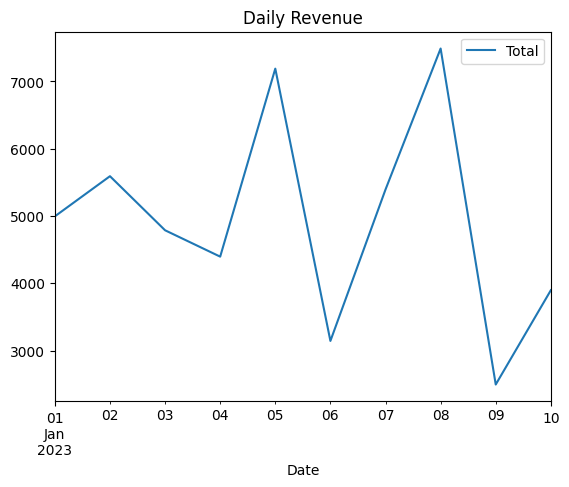

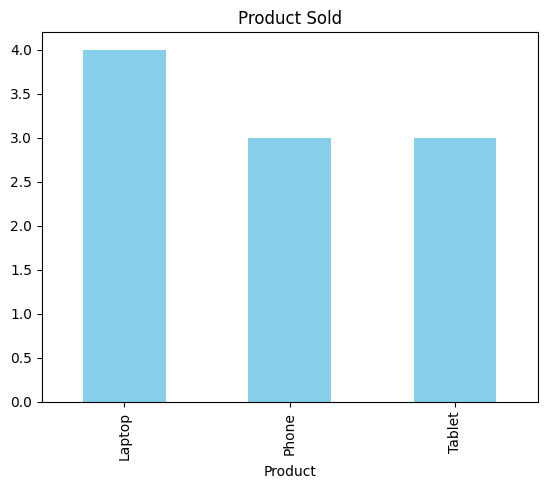

In [12]:
# Built-in Plotting
import matplotlib.pyplot as plt

# Line chart of daily sales
sales.plot(x="Date", y="Total", kind="line", title="Daily Revenue")
plt.show()

# Bar chart of units by product
sales["Product"].value_counts().plot(kind="bar", color='skyblue')
plt.title("Product Sold")
plt.show()

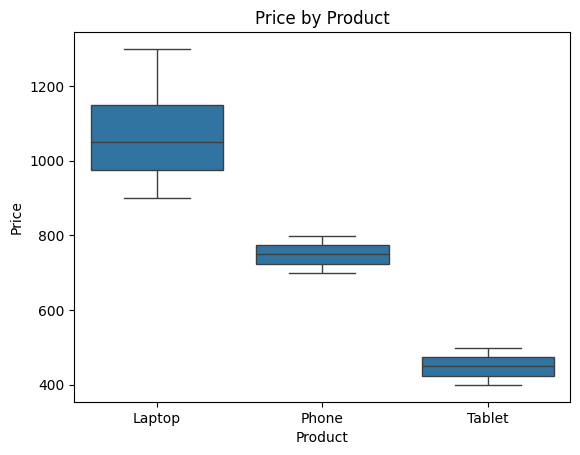

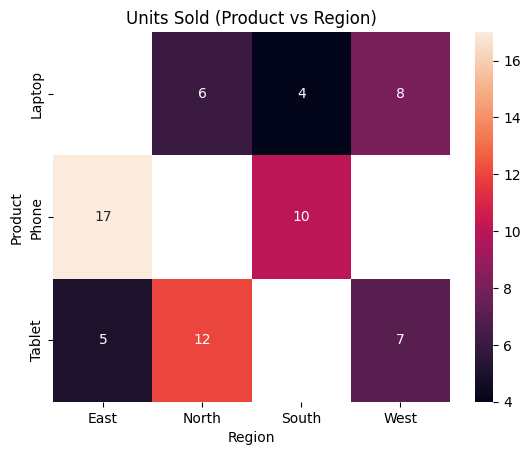

In [27]:
# Seaborn for enhanced visuals
import seaborn as sns

# Boxplot of prices by product
sns.boxplot(data=sales, x="Product", y="Price")
plt.title("Price by Product")
plt.show()

# Heatmap of units sold (product vs region)
pivot = sales.pivot_table(index="Product", columns="Region", values="Units", aggfunc="sum")
sns.heatmap(pivot, annot=True, fmt="g")
plt.title("Units Sold (Product vs Region)")
plt.show()

Product
Laptop    18682
Phone     20273
Tablet    10426
Name: Total, dtype: int64
Peak sales day: 2023-01-08 00:00:00
Region
East    665.666667
West    915.666667
Name: Price, dtype: float64


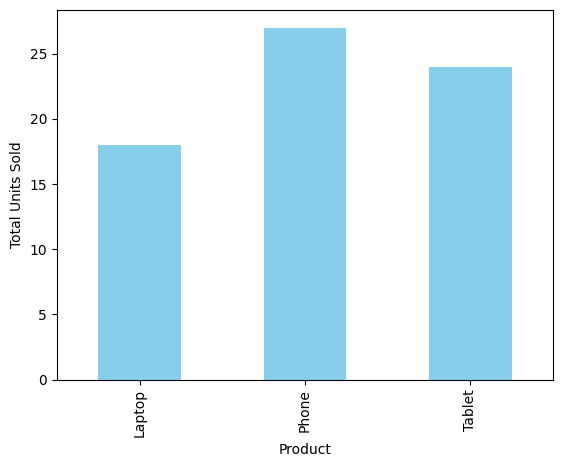

In [43]:
# Task 1: Calculate total revenue per product category
revenue = sales.groupby("Product")["Total"].sum()
print(revenue)

# Task 2: Find the day with highest sales
max_sales_day = sales.loc[sales["Total"].idxmax(), "Date"]
print("Peak sales day:", max_sales_day)

# Task 3: Compare average price between East and West regions
east_west = sales[sales["Region"].isin(["East", "West"])]
comparation = east_west.groupby("Region")["Price"].mean()
print(comparation)

# Task 4: Create a bar plot of total units sold by products
sales.groupby("Product")["Units"].sum().plot(kind="bar", color="skyblue")
plt.ylabel("Total Units Sold")
plt.show()

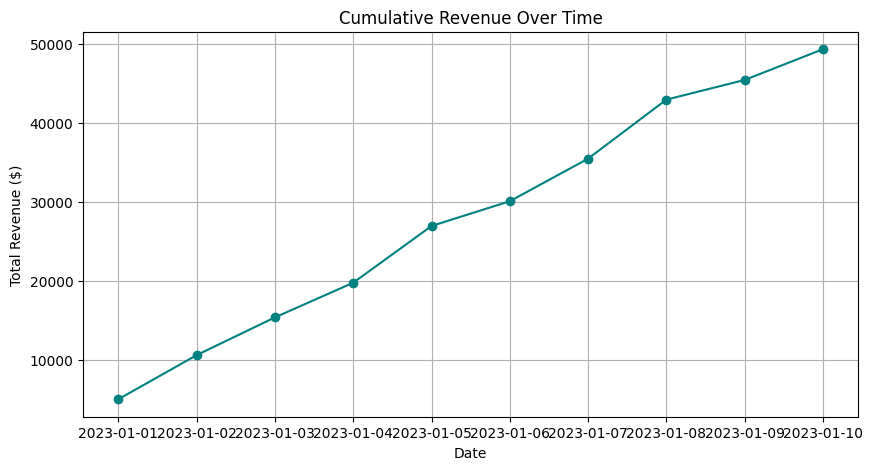

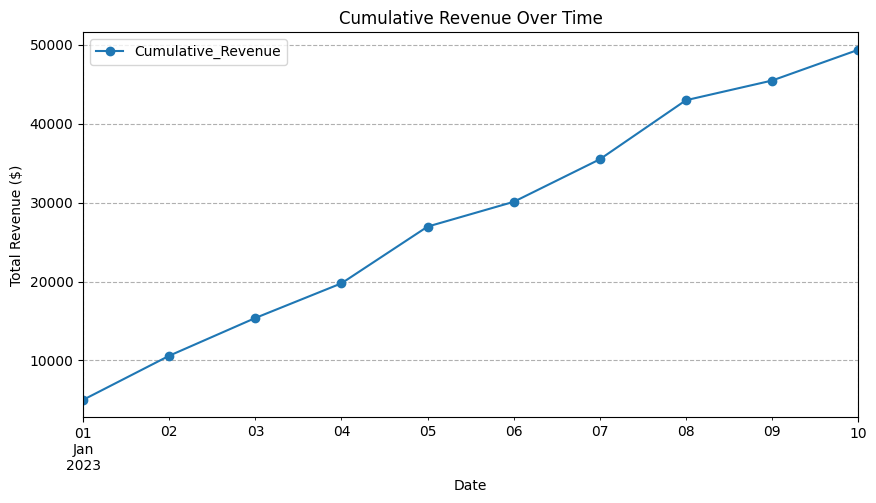

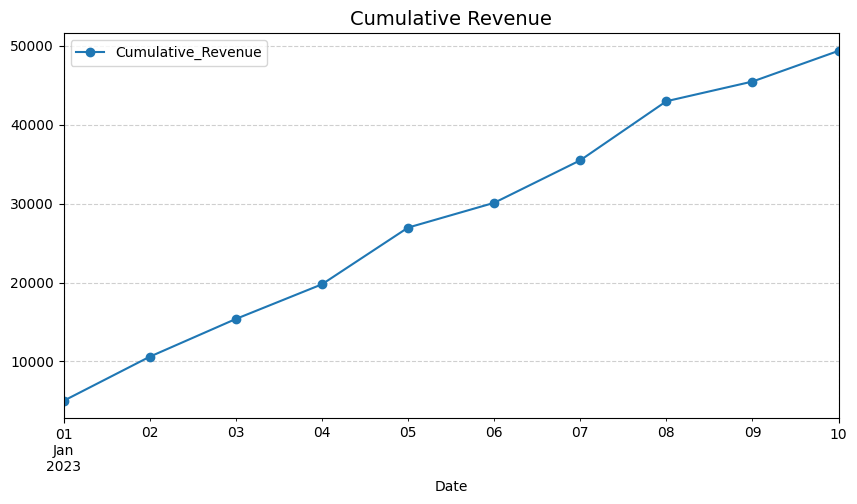

In [98]:
# Bonus Challenge

# Task 1: Calculate Profit Margin (20% Cost)
sales["Cost"] = sales["Price"] * 0.2
sales["Profit"] = sales["Total"] - (sales["Cost"] * sales["Units"])
sales["Profit_Margin"] = sales["Profit"] / sales["Total"] * 100

#print(sales[["Product", "Total", "Profit", "Profit_Margin"]].round(2))


# Task 2: Find which product has the most consistent daily sales 
# (lowest standard deviation in units sold).

# Calculate standard deviation by product
consistency = sales.groupby("Product")["Units"].std().sort_values()

#print("Products ranked by sales consistency:")
#print(consistency)

# Most consistent product
#print(f"\nMost consistent product: {consistency.idxmin()}  (∑={consistency.min():.2f})")


# Task 3: Cumulative Revenue Over Time

# Calculate cumulative sum
sales["Cumulative_Revenue"] = sales["Total"].cumsum()

# Plot
plt.figure(figsize=(10, 5))
plt.plot(sales["Date"], sales["Cumulative_Revenue"], marker='o', linestyle='-', color='teal')
plt.title("Cumulative Revenue Over Time")
plt.xlabel("Date")
plt.ylabel("Total Revenue ($)")
plt.grid(True)
plt.show()

# plot
sales.plot(x="Date", y="Cumulative_Revenue", figsize=(10, 5), marker='o', kind="line", title="Cumulative Revenue Over Time")
plt.xlabel("Date")
plt.ylabel("Total Revenue ($)")
plt.grid(True, linestyle='--')
plt.show()

# Pro tip (Use Pandas then enhance with matplotlib)
ax = sales.plot(x ="Date", y="Cumulative_Revenue", marker='o', kind="line", figsize=(10,5))
ax.set_title("Cumulative Revenue", fontsize=14)
ax.grid(True, linestyle='--', alpha=0.6)
plt.show()